# Exercises

In [1]:
from env import host, user, password

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data

np.random.seed(123)

In [3]:
def get_db_url(dbname, username=user, hostname=host, passw=password):
    url = f'mysql+pymysql://{username}:{passw}@{hostname}/iris_db'
    return url

In [4]:
url = get_db_url('iris_db', user, host, password)

In [5]:
iris = pd.read_sql('SELECT * FROM measurements',url)

In [6]:
iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
5,6,5.4,3.9,1.7,0.4,1
6,7,4.6,3.4,1.4,0.3,1
7,8,5.0,3.4,1.5,0.2,1
8,9,4.4,2.9,1.4,0.2,1
9,10,4.9,3.1,1.5,0.1,1


#### 1. What does the distribution of petal lengths look like?

In [7]:
iris.petal_length.describe()

count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: petal_length, dtype: float64

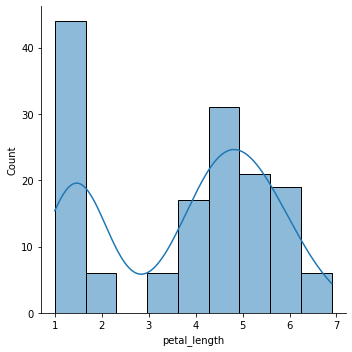

In [8]:
sns.displot(data = iris, x = 'petal_length', kde = True)

#### 2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.

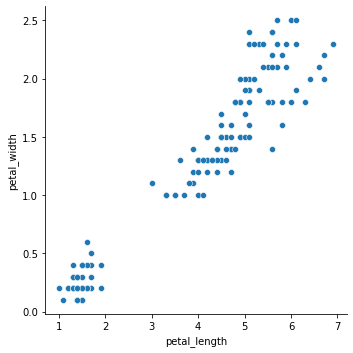

In [9]:
sns.relplot(data = iris, x = 'petal_length', y = 'petal_width')

In [10]:
# we can determine by observing the plot that there is some correlation

#### 3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.

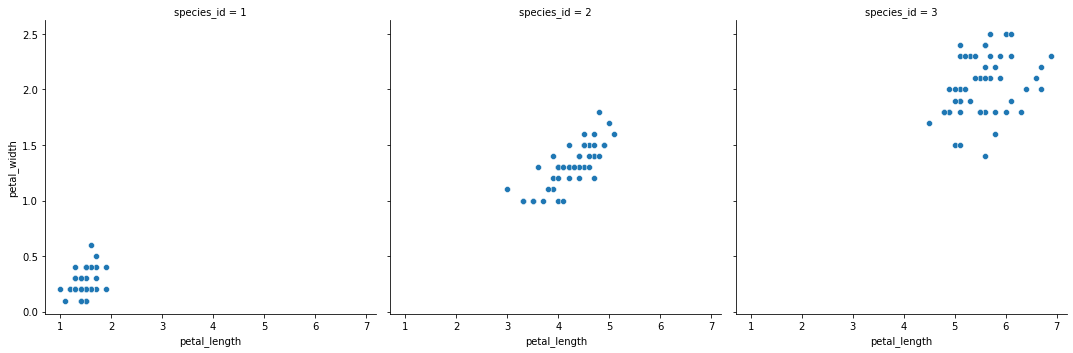

In [11]:
sns.relplot(data = iris, x = 'petal_length', y = 'petal_width', col = 'species_id')

In [12]:
# based on our plot above, it would be reasonable

#### 4. Which features would be best used to predict species?

In [13]:
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


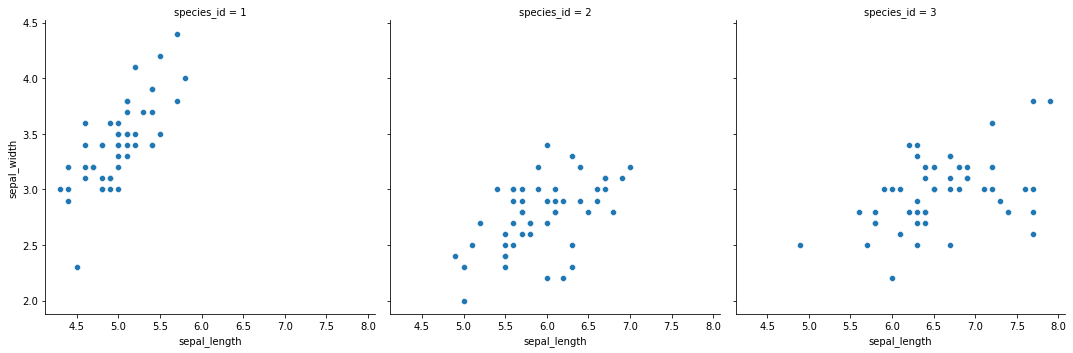

In [14]:
sns.relplot(data = iris, x = 'sepal_length', y = 'sepal_width', col = 'species_id')

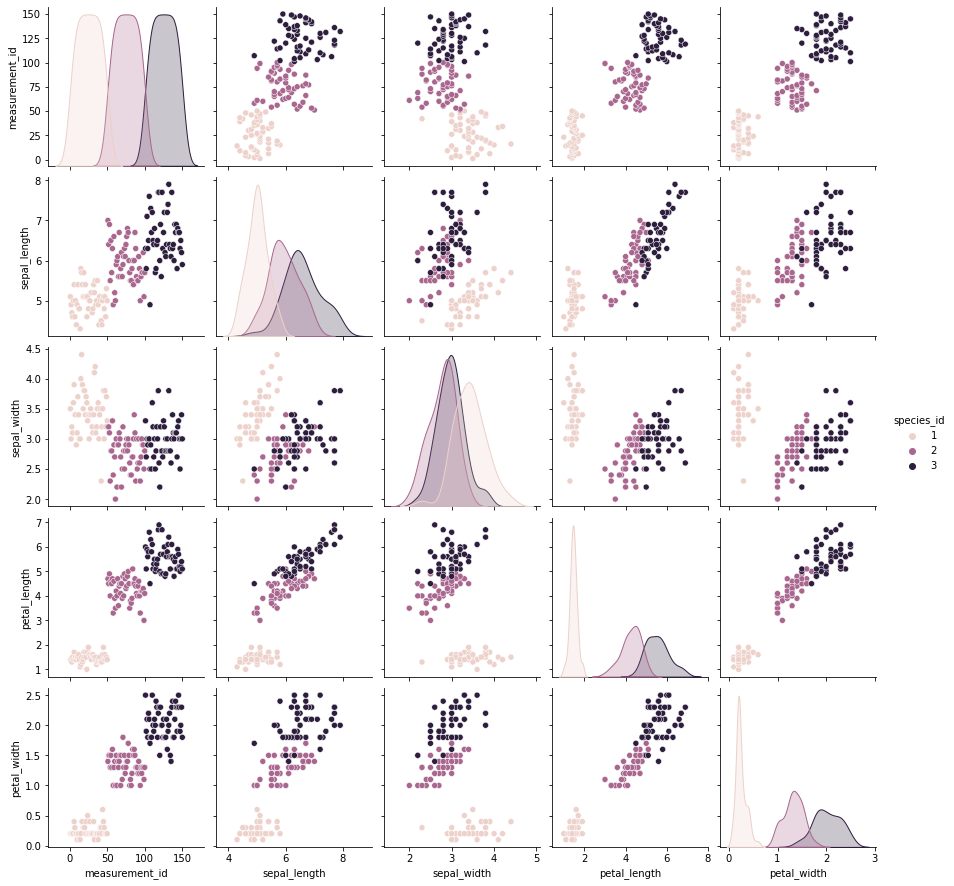

In [15]:
sns.pairplot(data = iris, hue = 'species_id')

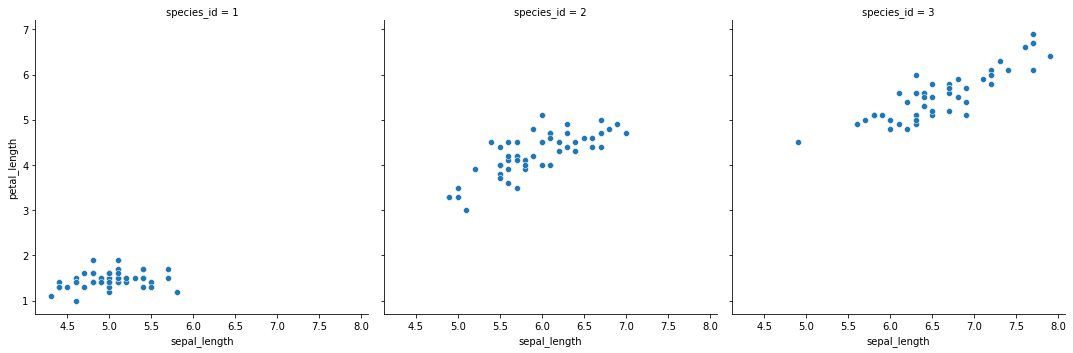

In [16]:
sns.relplot(data = iris, x = 'sepal_length', y = 'petal_length', col = 'species_id')

In [17]:
# based on the above research, I determine that petal_length and petal_width would be 
# best to predict the species. However, petal_length and sepal_length could also be used.

## Part 2

#### 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?
#### Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [18]:
ans = sns.load_dataset('anscombe')
ans

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [19]:
ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [20]:
ans.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

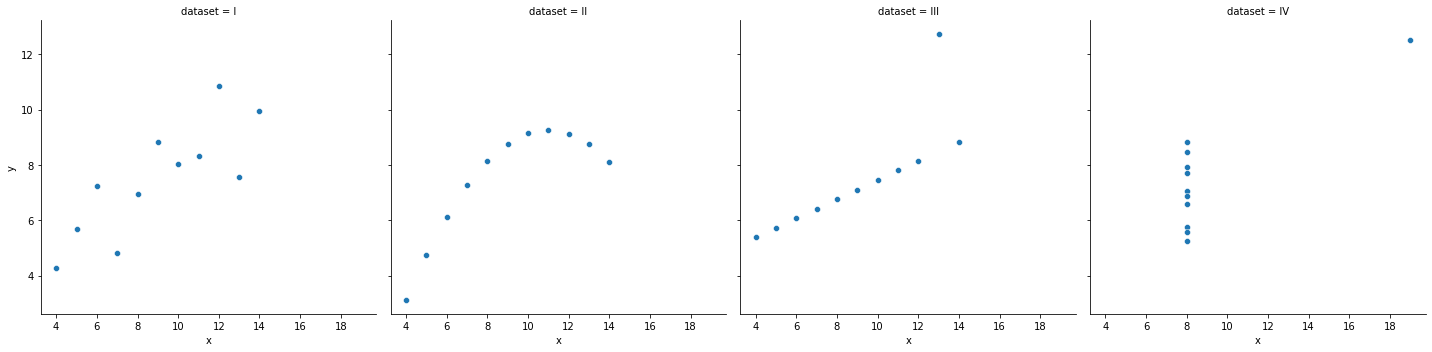

In [21]:
sns.relplot(data = ans, x = 'x', y = 'y', col = 'dataset')

#### 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [22]:
IS = data('InsectSprays')
IS.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [23]:
IS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


<AxesSubplot:xlabel='spray', ylabel='count'>

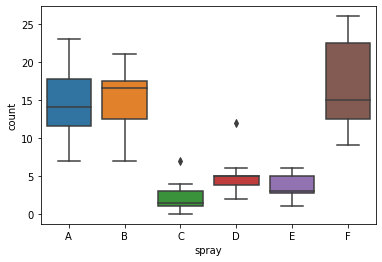

In [24]:
sns.boxplot(data = IS, y = 'count', x = 'spray')

#### 3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

In [37]:
swiss = data('swiss')
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


#### Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [26]:
swiss['is_catholic'] = swiss.Catholic > 50
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


#### Does whether or not a province is Catholic influence fertility?

In [27]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
 6   is_catholic       47 non-null     bool   
dtypes: bool(1), float64(4), int64(2)
memory usage: 2.6+ KB


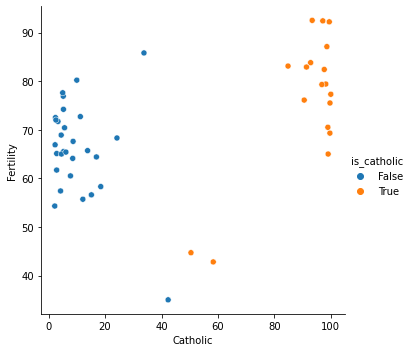

In [28]:
sns.relplot(data = swiss, x = 'Catholic', y = 'Fertility', hue = 'is_catholic')

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

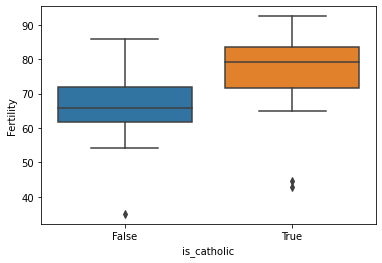

In [29]:
sns.boxplot(x = 'is_catholic', y='Fertility', data = swiss)

In [30]:
# according to my research, it is not possible to tell if there is a correlation without
# more statistical testing

#### What measure correlates most strongly with fertility?

In [38]:
swiss = data('swiss')
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


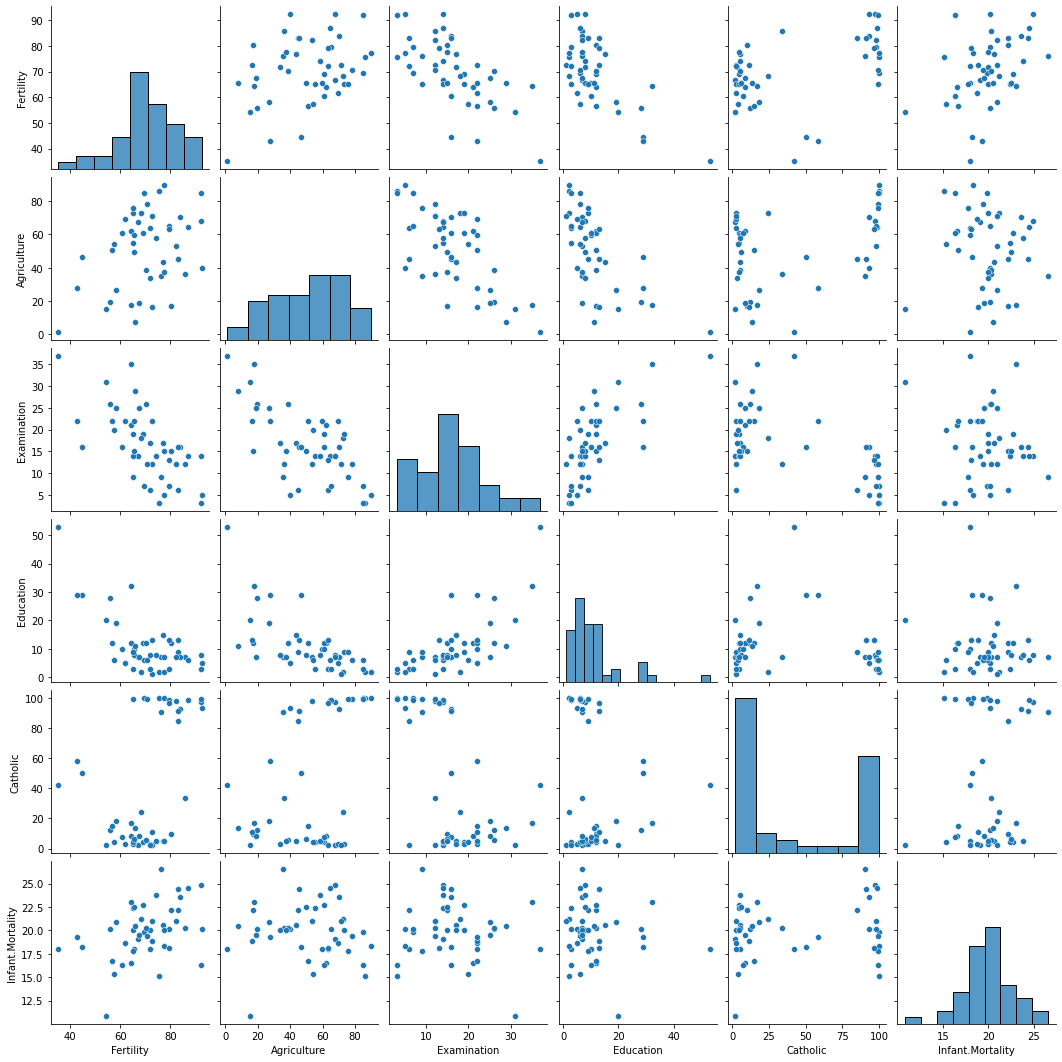

In [39]:
sns.pairplot(data=swiss)

In [40]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
Name: Fertility, dtype: float64

In [ ]:
# according to our corr, the strongest correlation would be Education
# However, Examination is a close second strongest and this realistically makes more sense
# as an indicator

#### 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [41]:
def get_db_url(dbname, username=user, hostname=host, passw=password):
    url = f'mysql+pymysql://{username}:{passw}@{hostname}/chipotle'
    return url

In [42]:
url = get_db_url('chipotle', user, host, password)

In [43]:
chipotle = pd.read_sql('Select * FROM orders', url)
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [44]:
chipotle.groupby('item_name').quantity.sum().nlargest(4)

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [45]:
chipotle.item_price = chipotle.item_price.str.strip('$')

In [46]:
chipotle.item_price = chipotle.item_price.astype('float')

In [47]:
chipotle.groupby('item_name').item_price.sum().nlargest(4).reset_index()

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Steak Bowl,2260.19


In [48]:
most_rev = chipotle.groupby('item_name').item_price.sum().nlargest(4).reset_index().reset_index()

<AxesSubplot:xlabel='item_name', ylabel='item_price'>

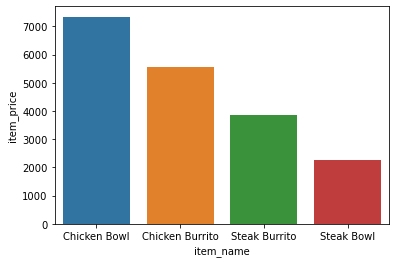

In [49]:
sns.barplot(data= most_rev, x = 'item_name', y = 'item_price')

In [ ]:
# dollarizer = lambda x: float(x[1:-1])
# chipo.item_price = chipo.item_price.apply(dollarizer)

#### 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [50]:
sleepstudy = data('sleepstudy')

In [51]:
sleepstudy

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [52]:
sleepstudy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [53]:
sleepstudy['Subject'] = 'Subject_' + sleepstudy.Subject.astype(str)

In [54]:
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,Subject_308
2,258.7047,1,Subject_308
3,250.8006,2,Subject_308
4,321.4398,3,Subject_308
5,356.8519,4,Subject_308


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

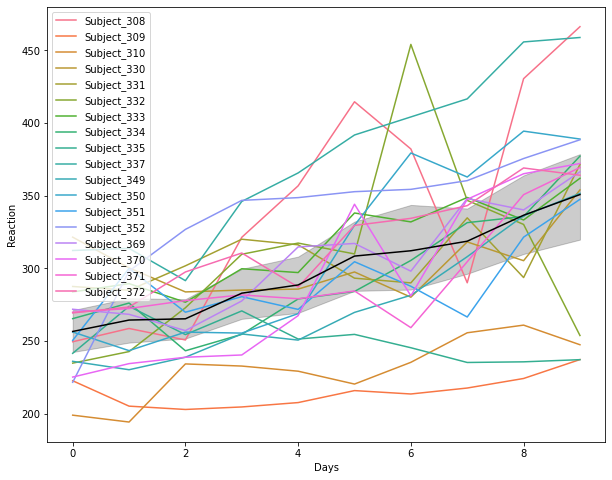

In [58]:
plt.figure(figsize=(10,8))

sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject')
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black')

